# 1.) Есть ли какая-либо существенная разница в диаметре котлеты

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Загрузка данных из файла Cutlets.csv
cutlets_data = pd.read_csv("/content/Cutlets.csv")

# Посмотрим на первые несколько строк
cutlets_data.head()


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


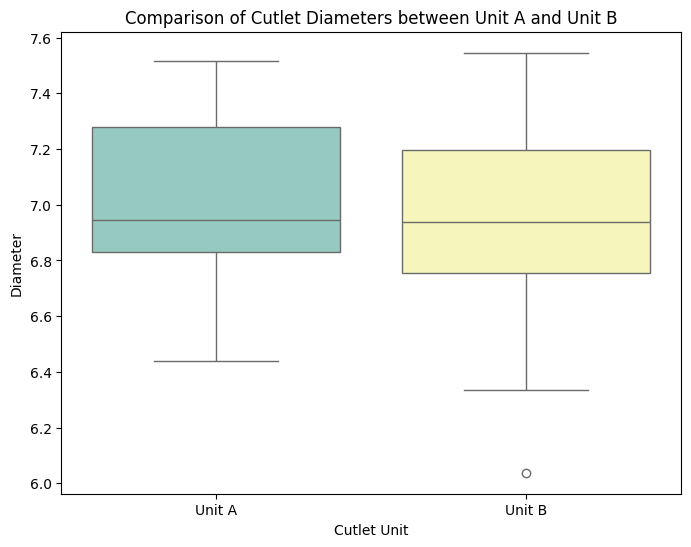

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
cutlets_data = pd.read_csv("/content/Cutlets.csv")

# Построение boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=cutlets_data, palette="Set3")
plt.title('Comparison of Cutlet Diameters between Unit A and Unit B')
plt.xlabel('Cutlet Unit')
plt.ylabel('Diameter')
plt.show()



In [ ]:
# Выборка данных для каждой группы (cutlet A и cutlet B)
cutlet_A = cutlets_data['Unit A'].dropna()
cutlet_B = cutlets_data['Unit B'].dropna()

# Выполнение t-теста Стьюдента
t_statistic, p_value = ttest_ind(cutlet_A, cutlet_B)

# Вывод результатов теста
print("Результаты t-теста:")
print("t-статистика =", t_statistic)
print("p-значение =", p_value)

# Оценка статистической значимости результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует существенная разница в диаметре котлеты.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет существенной разницы в диаметре котлеты.")

Результаты t-теста:
t-статистика = 0.7228688704678063
p-значение = 0.4722394724599501
Не удалось отвергнуть нулевую гипотезу: нет существенной разницы в диаметре котлеты.


# 2.) Есть ли разница в среднем ТАТ между различными лабораториями на уровне значимости 5%.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Загрузка данных
labtat_data = pd.read_csv('/content/lab_tat_updated.csv')

# Вывод первых строк данных для проверки
labtat_data.head()


,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


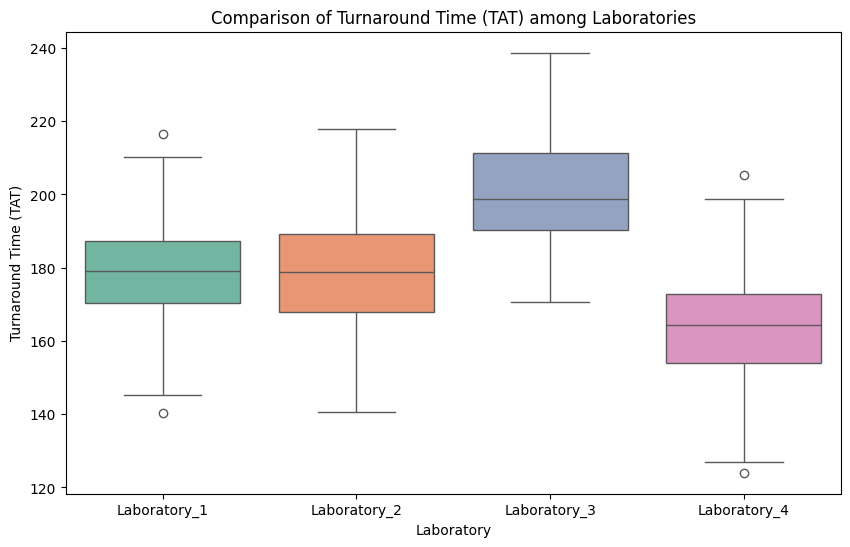

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
labtat_data = pd.read_csv('/content/lab_tat_updated.csv')

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=labtat_data, palette="Set2")
plt.title('Comparison of Turnaround Time (TAT) among Laboratories')
plt.xlabel('Laboratory')
plt.ylabel('Turnaround Time (TAT)')
plt.show()



In [ ]:
# Выполнение однофакторного дисперсионного анализа (ANOVA)
f_statistic, p_value = f_oneway(labtat_data['Laboratory_1'], labtat_data['Laboratory_2'], labtat_data['Laboratory_3'], labtat_data['Laboratory_4'])

# Вывод результатов анализа
print("Результаты однофакторного дисперсионного анализа (ANOVA):")
print("F-статистика =", f_statistic)
print("p-значение =", p_value)

# Проверка значимости различия между группами
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: разница в среднем TAT между лабораториями существует.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимой разницы в среднем TAT между лабораториями.")


Результаты однофакторного дисперсионного анализа (ANOVA):
F-статистика = 121.39264646442368
p-значение = 2.143740909435053e-58
Отвергаем нулевую гипотезу: разница в среднем TAT между лабораториями существует.


# 3.) Одинаковы ли пайки покупателей мужского и женского пола в разных регионах.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Загрузка данных из файла Buyerratio.csv
buyerratio = pd.read_csv("/content/BuyerRatio.csv")

buyerratio.head()


,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


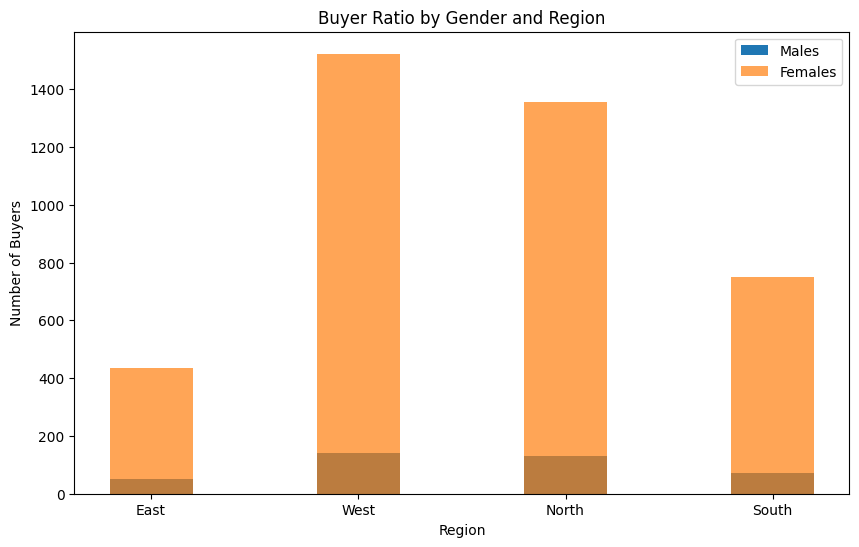

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
buyerratio = pd.read_csv("/content/BuyerRatio.csv")

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(buyerratio.columns[1:], buyerratio.iloc[0, 1:], width=0.4, label='Males')
plt.bar(buyerratio.columns[1:], buyerratio.iloc[1, 1:], width=0.4, label='Females', alpha=0.7)

# Добавление подписей
plt.xlabel('Region')
plt.ylabel('Number of Buyers')
plt.title('Buyer Ratio by Gender and Region')
plt.legend()
plt.show()



In [ ]:
# Создание DataFrame на основе предоставленных данных
buyerratio = pd.DataFrame({
    'East': [50, 142],
    'West': [435, 1523],
    'North': [131, 1356],
    'South': [70, 750]
}, index=['Males', 'Females'])

# Применение критерия Хи²
chi2_stat, p_val, _, _ = chi2_contingency(buyerratio)

# Вывод результатов теста
print("Значение статистики Хи²:", chi2_stat)
print("p-значение:", p_val)


Значение статистики Хи²: 165.81486029270053
p-значение: 1.0188452526371395e-35


### Нулевая гипотеза (H0) в данном случае предполагает, что пайки покупателей мужского и женского пола одинаковы во всех регионах. Альтернативная гипотеза (H1) заключается в том, что пайки покупателей мужского и женского пола различаются хотя бы в одном регионе.

### Исходя из результатов критерия Хи², также известного как критерий согласия, полученного значения p-значения, которое крайне мало (порядка 1.02e-35), мы отвергаем нулевую гипотезу. Это позволяет сделать вывод о том, что пайки покупателей мужского и женского пола различаются хотя бы в одном регионе.

# 4.) Изменяется ли дефектный процент в зависимости от центра

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Загрузка данных
order_form_data = pd.read_csv("/content/CustomerOrderform.csv")

# Вывод первых строк данных для ознакомления
order_form_data.head()



,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


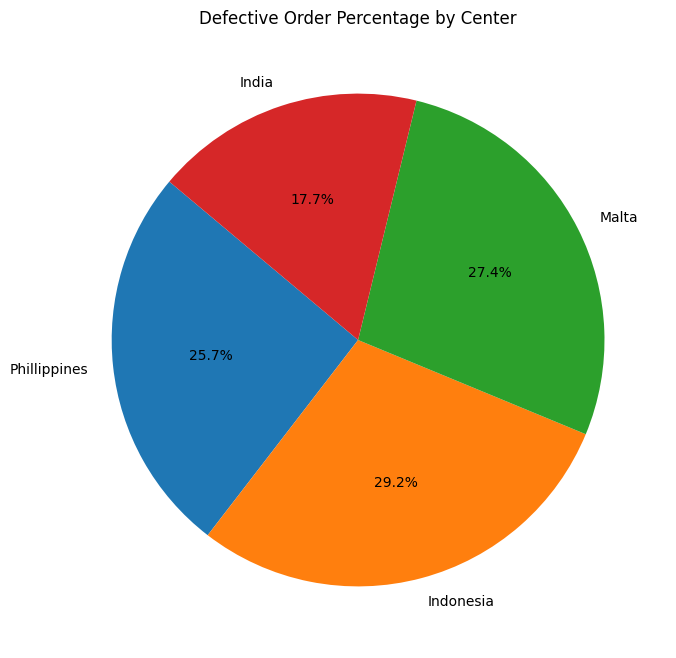

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
order_form_data = pd.read_csv("/content/CustomerOrderform.csv")

# Подсчет количества дефектных форм заказов для каждого центра
defect_counts = order_form_data.apply(lambda x: x.value_counts().get('Defective', 0))

# Создание круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(defect_counts, labels=defect_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Defective Order Percentage by Center')
plt.show()




In [ ]:
# Создаем DataFrame из предоставленных данных
data = {
    'Phillippines': ['Error Free', 'Error Free', 'Error Free', 'Error Free', 'Error Free'],
    'Indonesia': ['Error Free', 'Error Free', 'Defective', 'Error Free', 'Error Free'],
    'Malta': ['Defective', 'Error Free', 'Defective', 'Error Free', 'Defective'],
    'India': ['Error Free', 'Defective', 'Error Free', 'Error Free', 'Error Free']
}

order_form_data = pd.DataFrame(data)

# Преобразуем категориальные данные в числовые с помощью метода pd.get_dummies()
order_form_data_encoded = pd.get_dummies(order_form_data)

# Вывод первых строк преобразованных данных для ознакомления
print(order_form_data_encoded.head())

# Выполнение критерия Хи²
chi2_stat, p_val, _, _ = chi2_contingency(order_form_data_encoded)

# Вывод результатов теста
print("\nЗначение статистики Хи²:", chi2_stat)
print("p-значение:", p_val)



   Phillippines_Error Free  Indonesia_Defective  Indonesia_Error Free  \
0                     True                False                  True   
1                     True                False                  True   
2                     True                 True                 False   
3                     True                False                  True   
4                     True                False                  True   

   Malta_Defective  Malta_Error Free  India_Defective  India_Error Free  
0             True             False            False              True  
1            False              True             True             False  
2             True             False            False              True  
3            False              True            False              True  
4             True             False            False              True  

Значение статистики Хи²: 15.000000000000002
p-значение: 0.9207586905252108


### Результаты критерия Хи² показывают, что нет статистически значимой разницы в дефектности форм заказов между разными центрами обработки (p = 0.921). Это означает, что на текущем уровне значимости (5%) нет оснований отвергнуть нулевую гипотезу о том, что процент дефектных форм заказов одинаков для всех центров обработки.

# 5.) Процент мужчин и женщин, заходящих в магазин, различаются в зависимости от дня недели?

In [ ]:
import pandas as pd

# Загрузка данных
fantaloons_data = pd.read_csv("/content/Fantaloons.csv")

# Просмотр первых нескольких строк данных для оценки их структуры
fantaloons_data.head()


,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female


In [ ]:
# Создание таблицы сопряженности для дней недели и пола
contingency_table = pd.crosstab(fantaloons_data['Weekdays'], fantaloons_data['Weekend'])

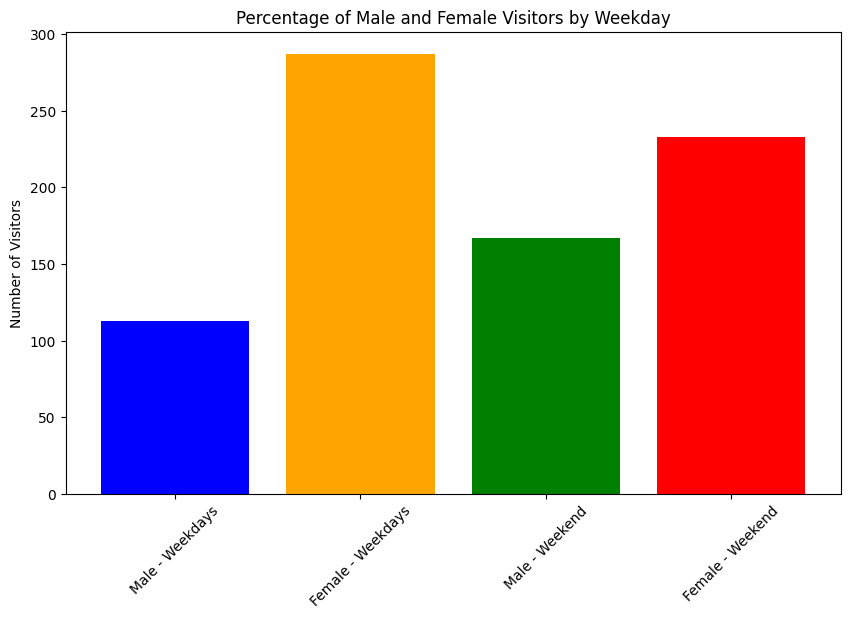

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
fantaloons_data = pd.read_csv("/content/Fantaloons.csv")

# Подсчет количества мужчин и женщин в будни и выходные
male_weekdays = fantaloons_data[fantaloons_data['Weekdays'] == 'Male'].shape[0]
female_weekdays = fantaloons_data[fantaloons_data['Weekdays'] == 'Female'].shape[0]
male_weekend = fantaloons_data[fantaloons_data['Weekend'] == 'Male'].shape[0]
female_weekend = fantaloons_data[fantaloons_data['Weekend'] == 'Female'].shape[0]

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
labels = ['Male - Weekdays', 'Female - Weekdays', 'Male - Weekend', 'Female - Weekend']
values = [male_weekdays, female_weekdays, male_weekend, female_weekend]
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Percentage of Male and Female Visitors by Weekday')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=45)
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создание DataFrame из предоставленных данных
fantaloons_data = pd.DataFrame({
    'Weekdays': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Weekend': ['Female', 'Male', 'Male', 'Female', 'Female']
})

# Создание таблицы сопряженности для дней недели и пола
contingency_table = pd.crosstab(fantaloons_data['Weekdays'], fantaloons_data['Weekend'])

# Выполнение критерия Хи-квадрат
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Вывод результатов теста
print("Значение статистики Хи²:", chi2_stat)
print("p-значение:", p_val)


Значение статистики Хи²: 0.3125000000000001
p-значение: 0.5761501220305787


### Судя по результатам: на уровне значимости 5% нет достаточных доказательств для подтверждения гипотезы о том, что процент мужчин и женщин, заходящих в магазин, различается в зависимости от дня недели. Значение p-значения составляет 0.576, что значительно превышает выбранный уровень значимости. Следовательно, мы не можем сделать вывод о наличии статистически значимых различий в проценте мужчин и женщин в разные дни недели.